## analysis of financial performance for top world companies

In [1]:
#importin libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#importing data
import os
for dirname, _, filenames in os.walk('/home/maede/Downloads/f.company'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/maede/Downloads/f.company/Companies_ranked_by_Revenue.csv
/home/maede/Downloads/f.company/Companies_ranked_by_P_E_ratio.csv
/home/maede/Downloads/f.company/Companies_ranked_by_Market_Cap.csv
/home/maede/Downloads/f.company/Companies_ranked_by_Earnings.csv
/home/maede/Downloads/f.company/Companies_ranked_by_Dividend_Yield.csv


In [2]:
[*filenames]

['Companies_ranked_by_Revenue.csv',
 'Companies_ranked_by_P_E_ratio.csv',
 'Companies_ranked_by_Market_Cap.csv',
 'Companies_ranked_by_Earnings.csv',
 'Companies_ranked_by_Dividend_Yield.csv']

In [3]:
#here we name each file so we can use them later

dividend_data = pd.read_csv('/home/maede/Downloads/f.company/Companies_ranked_by_Dividend_Yield.csv')
earnings_data = pd.read_csv('/home/maede/Downloads/f.company/Companies_ranked_by_Earnings.csv')
market_cap_data = pd.read_csv('/home/maede/Downloads/f.company/Companies_ranked_by_Market_Cap.csv')
P_E_ratio_data = pd.read_csv('/home/maede/Downloads/f.company/Companies_ranked_by_P_E_ratio.csv')
Revenue_data = pd.read_csv('/home/maede/Downloads/f.company/Companies_ranked_by_Revenue.csv')

In [4]:
#now we use a pandas method to check the missing values

dividend_data.isna().sum(), earnings_data.isna().sum(), market_cap_data.isna().sum(), P_E_ratio_data.isna().sum(), Revenue_data.isna().sum()



(Rank                  0
 Name                  0
 Symbol                1
 dividend_yield_ttm    0
 price (GBP)           0
 country               2
 dtype: int64,
 Rank            0
 Name            0
 Symbol          1
 earnings_ttm    0
 price (GBP)     0
 country         2
 dtype: int64,
 Rank           0
 Name           0
 Symbol         1
 marketcap      0
 price (GBP)    0
 country        2
 dtype: int64,
 Rank            0
 Name            0
 Symbol          1
 pe_ratio_ttm    0
 price (GBP)     0
 country         2
 dtype: int64,
 Rank           0
 Name           0
 Symbol         1
 revenue_ttm    0
 price (GBP)    0
 country        2
 dtype: int64)

In [5]:
#now we remove missing values temporarily

dividend_data.dropna(axis=0,subset=['country','Symbol'],inplace=False)
earnings_data.dropna(axis=0,subset=['country','Symbol'],inplace=False)
market_cap_data.dropna(axis=0,subset=['country','Symbol'],inplace=False)
P_E_ratio_data.dropna(axis=0,subset=['country','Symbol'],inplace=False)
Revenue_data.dropna(axis=0,subset=['country','Symbol'],inplace=False)

,Rank,Name,Symbol,revenue_ttm,price (GBP),country
0,1,Walmart,WMT,665035000000,61.029186,United States
1,2,Amazon,AMZN,604334000000,143.454209,United States
2,3,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Sinopec,600028.SS,435696880608,0.748295,China
4,5,PetroChina,601857.SS,429671599508,0.969769,China
...,...,...,...,...,...,...
9907,9908,Kinnevik,KINV-A.ST,-755524598,6.067929,Sweden
9908,9909,Sofina,SOF.VI,-1960650040,212.106043,Belgium
9909,9910,Quilter,QLT.L,-4921465842,1.331998,United Kingdom
9910,9911,M&G plc,MNG.L,-10545825404,2.073004,United Kingdom


In [6]:
dataframes = [dividend_data , earnings_data , market_cap_data , P_E_ratio_data , Revenue_data]

In [7]:
merged_df = dividend_data.drop('Rank',axis=1).merge(earnings_data.drop('Rank',axis=1), on =['Symbol','Name' , 'price (GBP)' , 'country'])
merged_df = merged_df.merge(market_cap_data.drop('Rank',axis=1), on =['Symbol','Name' , 'price (GBP)' , 'country'])
merged_df = merged_df.merge(P_E_ratio_data.drop('Rank',axis=1), on =['Symbol','Name' , 'price (GBP)' , 'country'])
merged_df = merged_df.merge(Revenue_data.drop('Rank',axis=1), on =['Symbol','Name' , 'price (GBP)' , 'country'])
merged_df

,Name,Symbol,dividend_yield_ttm,price (GBP),country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm
0,LianBio,LIAN,300940.0,0.243065,United States,-8.710700e+07,2.626636e+07,-0.403797,0
1,Richter Gedeon,RIG2.F,150430.0,23.726825,Hungary,4.465570e+08,4.330167e+09,20.707700,3435019066
2,Delek Group,DLEKG.TA,117114.0,87.735884,Israel,1.084660e+09,1.630925e+09,-27.898300,3144217178
3,LMP Automotive Holdings,LMPX,106250.0,0.121914,United States,1.175030e+06,1.454612e+06,-0.150943,318486368
4,MBIA,MBI,22346.4,2.727817,United States,-6.630000e+08,1.391956e+08,-0.710317,-48000000
...,...,...,...,...,...,...,...,...,...
9824,Lite-On Technology,2301.TW,0.0,2.366853,Taiwan,5.436000e+08,5.543642e+09,15.908900,4367274225
9825,Zensho Holdings,7550.T,0.0,42.447877,Japan,3.223280e+08,6.650099e+09,275.203000,6587771160
9826,BKV Corporation,BKV,0.0,13.867596,United States,-7.321100e+07,1.166620e+09,-12.410500,662392000
9827,BioAge Labs,BIOA,0.0,16.679304,United States,-5.035200e+07,5.615455e+08,0.000000,0


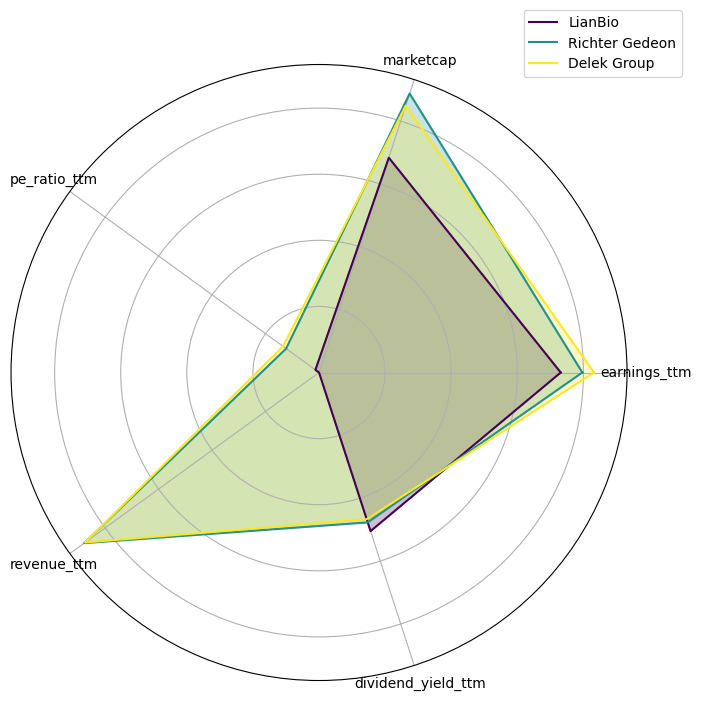

In [8]:


def log_normalize(series):
    # Add a small constant to avoid log(0)
    series = series.abs() + 1e-10
    # Apply logarithmic normalization
    return np.log1p(series)

def spyder_plotter(symbols, df):
    # Select the rows for the specified companies
    company_data = df[df['Symbol'].isin(symbols)].copy()

    if company_data.empty:
        print(f"No data found for symbols: {symbols}")
        return

    # Select the columns for the spider plot
    columns = ['earnings_ttm', 'marketcap', 'pe_ratio_ttm', 'revenue_ttm', 'dividend_yield_ttm']

    # Ensure columns are of float type before normalization
    for col in columns:
        company_data[col] = company_data[col].astype(float)

    # Logarithmic normalization
    for col in columns:
        company_data.loc[:, col] = log_normalize(company_data[col])

    # Prepare the data for the spider plot
    labels = columns
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]


    
    # Create the spider plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    colors = plt.cm.viridis(np.linspace(0, 1, len(symbols)))
    for i, symbol in enumerate(symbols):
        company_row = company_data[company_data['Symbol'] == symbol]
        if not company_row.empty:
            values = company_row.iloc[0][columns].tolist()
            values += values[:1]
            ax.fill(angles, values, color=colors[i], alpha=0.25)
            ax.plot(angles, values, color=colors[i], label=company_row.iloc[0]['Name'])

    # Add labels and legend
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the plot
    plt.show()

# Example usage
spyder_plotter(['LIAN', 'RIG2.F', 'DLEKG.TA'], merged_df)


In [9]:
px.bar(dividend_data.head(10),x='Name',y='dividend_yield_ttm',color='Name',title='Top 10 Companies ranked by Dividend Yield')


In [10]:
px.bar(earnings_data.head(10),x='Name',y='earnings_ttm',color='Name',title='Top 10 Companies ranked by Earnings')

In [11]:
px.bar(market_cap_data.head(10),x='Name',y='marketcap',color='Name',title='Top 10 Companies ranked by Market Cap')

In [12]:
px.bar(Revenue_data.head(10),x='Name',y='revenue_ttm',color='Name',title='Top 10 Companies ranked by Revenue')

In [14]:
countries = earnings_data['country'].unique()
countries

array(['Saudi Arabia', 'United States', 'China', 'Japan', 'Taiwan',
       'France', 'Norway', 'United Kingdom', 'Australia', 'Switzerland',
       'Germany', 'Canada', 'South Korea', 'Spain', 'Brazil', 'Sweden',
       'Denmark', 'Italy', 'Turkey', 'India', 'Netherlands', 'Hong Kong',
       'Belgium', 'Ireland', 'Singapore', 'Thailand',
       'United Arab Emirates', 'Colombia', 'Finland', 'Mexico', 'Qatar',
       'Austria', 'Indonesia', 'Bermuda', 'Poland', 'Czech Republic',
       'Israel', 'South Africa', 'Hungary', 'Luxembourg', 'Portugal',
       'Kazakhstan', 'Malaysia', 'Philippines', 'Kuwait', 'Argentina',
       'Chile', 'Greece', 'Russia', 'Egypt', nan, 'Romania', 'Vietnam',
       'Nigeria', 'New Zealand', 'Monaco', 'Panama', 'Bahrain',
       'Guernsey', 'Cambodia', 'Cyprus', 'Cayman Islands', 'Jersey',
       'Peru', 'Uruguay', 'Iceland', 'Isle of Man', 'Jordan', 'Malta',
       'Estonia', 'Lithuania', 'Bahamas', 'USA', 'Oman', 'Sudan',
       'Pakistan', 'Gibraltar', '

In [15]:
data_earnings = []
data_market_cap = []
data_Revenue = []
data_dividend = []
data_PE_ratio = []
for country in countries:
    data_earnings.append(earnings_data[earnings_data['country']==country].head(1))
    data_market_cap.append(market_cap_data[market_cap_data['country']==country].head(1))
    data_Revenue.append(Revenue_data[Revenue_data['country']==country].head(1))
    data_dividend.append(dividend_data[dividend_data['country']==country].head(1))
    data_PE_ratio.append(P_E_ratio_data[P_E_ratio_data['country']==country].head(1))


In [17]:
earnings_data_by_countryies = pd.concat(data_earnings)
market_cap_data_by_countryies = pd.concat(data_market_cap)
Revenue_data_by_countryies = pd.concat(data_Revenue)
dividend_data_by_countryies = pd.concat(data_dividend)
P_E_ratio_data_by_countryies = pd.concat(data_PE_ratio)

In [18]:
px.bar(earnings_data_by_countryies.head(10),x='Name',y='earnings_ttm',color='country',title='Top Company by Earnings in each country (Top 10)')


In [19]:
market_cap_data_by_countryies = market_cap_data_by_countryies.sort_values(by='marketcap',ascending=False)
px.bar(market_cap_data_by_countryies.head(10),x='Name',y='marketcap',color='country',title='Top Company by Market Cap in each country (Top 10)')

In [20]:
Revenue_data_by_countryies = Revenue_data_by_countryies.sort_values(by='revenue_ttm',ascending=False)
px.bar(Revenue_data_by_countryies.head(10),x='Name',y='revenue_ttm',color='country',title='Top Company by Revenue in each country (Top 10)')

In [21]:
dividend_data_by_countryies = dividend_data_by_countryies.sort_values(by='dividend_yield_ttm',ascending=False)
px.bar(dividend_data_by_countryies.head(10),x='Name',y='dividend_yield_ttm',color='country',title='Top Company by Dividend Yield in each country (Top 10)')


In [22]:
P_E_ratio_data_by_countryies = P_E_ratio_data_by_countryies.sort_values(by='pe_ratio_ttm',ascending=False)
px.bar(P_E_ratio_data_by_countryies.head(10),x='Name',y='pe_ratio_ttm',color='country',title='Top Company by P/E Ratio in each country (Top 10)')

In [23]:
dividend_data.drop(columns=['Rank'],inplace=True)
market_cap_data.drop(columns=['Rank'],inplace=True)
earnings_data.drop(columns=['Rank'],inplace=True)
P_E_ratio_data.drop(columns=['Rank'],inplace=True)
Revenue_data.drop(columns=['Rank'],inplace=True)

In [24]:
merged_data = earnings_data.merge(market_cap_data,on=['Symbol','Name','country', 'price (GBP)'],how='inner').merge(dividend_data,on=['Symbol','Name','country', 'price (GBP)']).merge(P_E_ratio_data,on=['Symbol','Name','country', 'price (GBP)']).merge(Revenue_data,on=['Symbol','Name','country', 'price (GBP)'])

In [25]:
merged_data.head()

,Name,Symbol,earnings_ttm,price (GBP),country,marketcap,dividend_yield_ttm,pe_ratio_ttm,revenue_ttm
0,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia,1.348543e+12,236.326,13.16550,495354806850
1,ICBC,1398.HK,5.790460e+10,0.453556,China,2.125090e+11,0.000,4.21332,112933681186
2,China Construction Bank,601939.SS,5.363750e+10,0.852580,China,1.528187e+11,478.368,5.90228,105087977531
3,China Pacific Insurance,601601.SS,4.600970e+10,4.203787,China,3.666721e+10,0.000,13.52160,47839978790
4,Agricultural Bank of China,601288.SS,4.301480e+10,0.516066,China,1.761879e+11,920.527,6.59462,96889079690


In [ ]:
px.scatter(merged_data.head(15),x='earnings_ttm',y='marketcap',color='country',title='Earnings vs Market Cap (Top 15 Companies)' )

In [27]:
px.scatter(merged_data.head(15),x='earnings_ttm',y='dividend_yield_ttm',color='country',title='Earnings vs Dividend Yield (Top 15 Companies)')


In [28]:
px.scatter(merged_data.head(15),x='earnings_ttm',y='revenue_ttm',color='country',title='Earnings vs Revenue (Top 15 Companies)')


In [29]:
px.scatter(merged_data.head(15),x='revenue_ttm',y='pe_ratio_ttm',color='country',title='Revenue vs P/E Ratio (Top 15 Companies)')


In [30]:
px.scatter(merged_data.head(15),x='revenue_ttm',y='marketcap',color='country',title='Revenue vs Market Cap (Top 15 Companies)')


<Axes: >

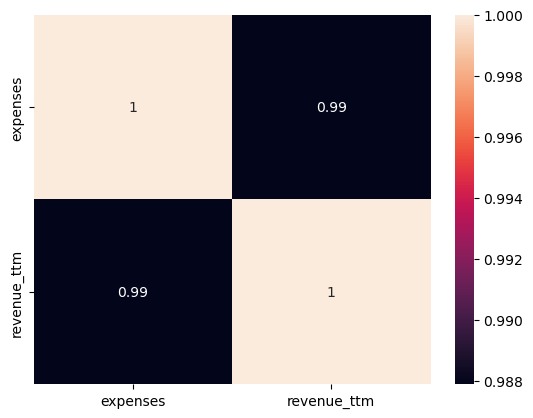

In [31]:
merged_data['expenses'] = merged_data['revenue_ttm'] - merged_data['earnings_ttm']
sns.heatmap(merged_data[['expenses','revenue_ttm']].corr(),annot=True)

In [32]:
X = merged_data[['expenses']]
y = merged_data['revenue_ttm']

## Embedding the Machine Learning Algorithm

In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train_x,train_y)

LinearRegression()

In [ ]:
yhat = LR.predict(test_x)
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:',r2_score(test_y,yhat))
print('MSE:',mean_squared_error(test_y,yhat))

R2 Score: 0.9390421162980993
MSE: 2.617667273179789e+19


/home/maede/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



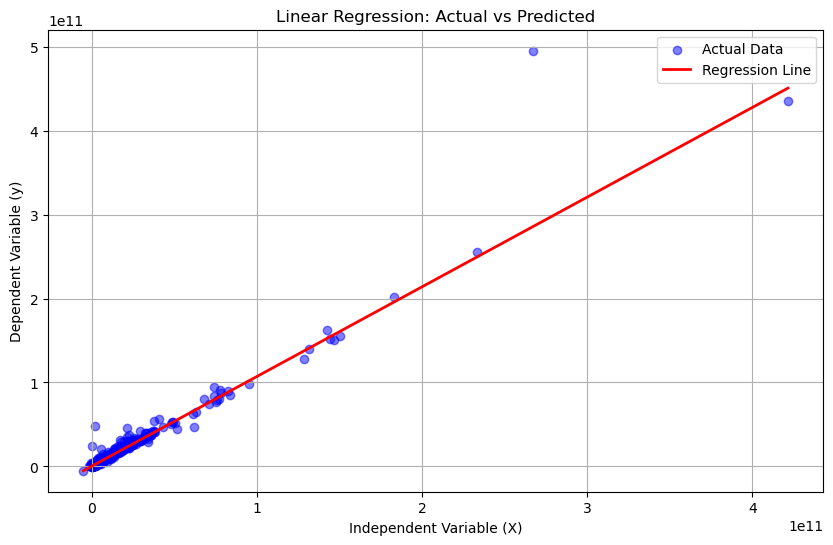

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X and y are already defined
# X should be a 2D array (n_samples, n_features) and y should be a 1D array (n_samples,)
# Example: X = data[['feature1']].values, y = data['target'].values

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
LR = LinearRegression()
LR.fit(train_x, train_y)

# Make predictions on the test set
predictions = LR.predict(test_x)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(test_x, test_y, color='blue', label='Actual Data', alpha=0.5)

# Plotting the regression line
# For a linear regression with one feature (1D), we can use the coefficients directly
x_range = np.linspace(test_x.min(), test_x.max(), 100).reshape(-1, 1)  # Generate values for x-axis
y_range = LR.predict(x_range)  # Predict y values for the x_range

plt.plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

# Adding titles and labels
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid()
plt.show()